[0.99214279651641846, 2.4978797435760498, 3.5009911060333252, 4.4933414459228516, 5.7537765502929688, 7.2556867599487305, 8.9999980926513672, 13.25, 33.25]


In [16]:
import h5py
import pyfits
h = pyfits.open('/data/galprop2/FITS/rbands_co10mm_v2_2001_qdeg_9R_new.fits.gz')
rings = [.5*(r1+r2) for r1,r2 in h[1].data]



X_CO_values = [6.2560429788495372e+19, 3.4680211758611346e+20, 5.5591619439658749e+20, 3.4376189911339867e+20, 3.151243723689986e+20, 2.6276239270686782e+20, 6.6356248035046998e+19, 1.9567428895977403e+21, 6.8600341256635098e+24]
X_CO_radius = [0.99214279651641846, 2.4978797435760498, 3.5009911060333252, 4.4933414459228516, 5.7537765502929688, 7.2556867599487305, 8.9999980926513672, 13.25, 33.25]
X_CO_interp = lambda x: 10**np.interp(np.log10(x), np.log10(X_CO_radius), np.log10(X_CO_values))


def PlotSeries(start, stop, text, ylim=None, mod=2):
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        print i, i%mod
        if (i%mod)==0:
            h = h5py.File('../mod_c/'+model)
            
            fit_global = h['/fit_results/global'].attrs
            vals = X_CO_interp(rings)*fit_global['global_XCO']
            plt.plot(rings, vals, label=model.replace('_','-'), marker='d')
    
def PlotBase():
    
    models = ['../mod_c/base_2D_XCO_stripped.hdf5', '../mod_c/base_3D_XCO_stripped.hdf5'] 
    
    for i, model in enumerate(models):

        #try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)

            fit_global = h['/fit_results/global'].attrs
            vals = X_CO_interp(rings)*fit_global['global_XCO']
            plt.plot(rings, vals, label=model.replace('_','-'), marker='d')
            

        #except: pass


    

0 0
1 1
continuing
2 0
3 1
continuing
4 0
5 1
continuing
6 0
7 1
continuing
8 0
9 1
continuing
10 0
0 0
1 0
2 0
3 0
4 0


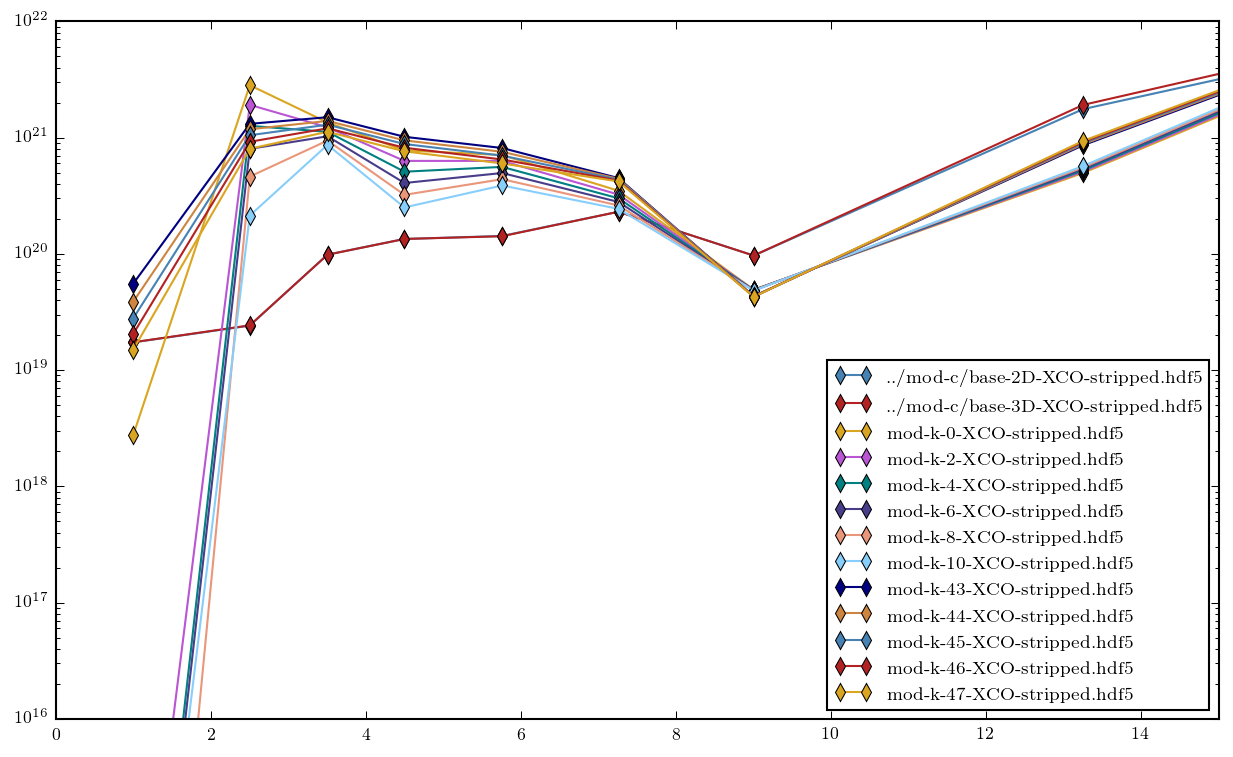

In [17]:
plt.figure(figsize=(10,6))
PlotBase()
PlotSeries(0,11,'xco',mod=2)
PlotSeries(43,48,'xco',mod=1)
# PlotSeries(102,103,'xco')
#PlotSeries(153,154,'xco')
plt.legend(loc=4)
plt.xlim(0,15)
plt.ylim(1e16,1e22)
plt.yscale('log')

In [62]:
h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
fit_global = h_base['/fit_results/global'].attrs
vals = X_CO_interp(rings)*fit_global['global_XCO']

print list(rings), list(vals)


[0.99214279651641846, 2.4978797435760498, 3.5009911060333252, 4.4933414459228516, 5.7537765502929688, 7.2556867599487305, 8.9999980926513672, 13.25, 33.25] [6.2560429788495372e+19, 3.4680211758611346e+20, 5.5591619439658749e+20, 3.4376189911339867e+20, 3.151243723689986e+20, 2.6276239270686782e+20, 6.6356248035046998e+19, 1.9567428895977403e+21, 6.8600341256635098e+24]


FITS_rec([(0.0, 1.9842856), (1.9842856, 3.0114739), (3.0114739, 3.9905083),
       (3.9905083, 4.9961748), (4.9961748, 6.5113778),
       (6.5113778, 7.9999962), (7.9999962, 10.0), (10.0, 16.5),
       (16.5, 50.0)], 
      dtype=[('Rmin', '>f4'), ('Rmax', '>f4')])